In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.modules.activation as activations
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler

In [2]:
%matplotlib inline
dataset = MNIST(root='data/',download=True)

In [3]:
len(dataset)

60000

(<PIL.Image.Image image mode=L size=28x28>, 5)

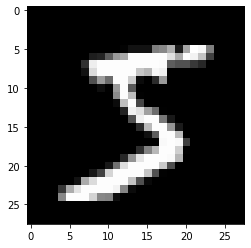

In [4]:
im=dataset[0][0]
plt.imshow(im,cmap='gray')
dataset[0]

In [5]:
transform = transforms.ToTensor()

In [6]:
Training_imgs=MNIST(root='data/',
                    train=True,
                    transform=transform)
Test_imgs=MNIST(root='data/',
                train=False,
                transform=transform)
(len(Training_imgs),len(Test_imgs))

(60000, 10000)

In [7]:
Training_imgs[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
Training_imgs[0][0].shape

torch.Size([1, 28, 28])

In [9]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer=nn.Conv2d(in_channels=1,out_channels=5,kernel_size=5,stride=1,bias=True)
        self.pooling_layer=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fully_connected_layer=nn.Linear(720,10)
        self.act1=nn.modules.activation.Tanh()
        self.act2=nn.modules.activation.Softmax(dim=1)
    
    def forward(self,inputs):
        conv=self.conv_layer(inputs)
        conv_a=self.act1(conv)
        pooled_a=self.pooling_layer(conv_a)
        reduced_dim_pooled=pooled_a.reshape(-1,720)
        lin_out=self.fully_connected_layer(reduced_dim_pooled)
        outs=self.act2(lin_out)
        return outs
    

In [9]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1=nn.Linear(784,30)
        self.lin2=nn.Linear(30,10)
        self.act=nn.modules.activation.Sigmoid()
    
    def forward(self,inputs):
        z1=self.lin1(inputs.reshape(-1,784))
        a1=self.act(z1)
        z2=self.lin2(a1)
        a2=self.act(z2)
        return a2

In [89]:
class BiggerConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer=nn.Conv2d(in_channels=1,out_channels=20,kernel_size=5,stride=1,bias=True)
        self.pooling_layer=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fully_connected_layer=nn.Linear(2880,100)
        self.fully_connected_layer2=nn.Linear(100,10)
        self.act1=nn.modules.activation.Tanh()
        self.act2=nn.modules.activation.Softmax(dim=1)
    
    def forward(self,inputs):
        conv=self.conv_layer(inputs)
        conv_a=self.act1(conv)
        pooled_a=self.pooling_layer(conv_a)
        reduced_dim_pooled=pooled_a.reshape(-1,2880)
        lin_out1=self.fully_connected_layer(reduced_dim_pooled)
        outs1=self.act1(lin_out1)
        lin_out2=self.fully_connected_layer2(outs1)
        outs2=self.act2(lin_out2)
        return outs2
    

In [10]:
def SplitTestset():
    n=60000
    perm_arr=np.random.permutation(n)
    n_test=50000
    return perm_arr[:n_test],perm_arr[n_test:]

In [11]:
def accuracy(predictions,labels):
    return (torch.sum(predictions==labels).item())

In [12]:
train_indicies,validation_indicies=SplitTestset()

In [13]:
sampler=RandomSampler(train_indicies) #Randomly sample a mini_batch from the training indices(used during training)

In [90]:
model=BiggerConvNet()
loss=nn.CrossEntropyLoss()
num_epochs=15
for epoch in range(num_epochs):
    optimizer=torch.optim.SGD(params=model.parameters(),lr=0.5*(1.01-epoch/num_epochs),weight_decay=0.00001)
    dataloader=DataLoader(dataset=Training_imgs,batch_size=10,sampler=sampler)
    for Train_imgs,targets in dataloader:
        outs=model(Train_imgs)
        l=loss(outs,targets)
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
    #Printing out the models accuracy on the validation set.
    with torch.no_grad():
        valid_set=DataLoader(dataset=Training_imgs,batch_size=10000,sampler=RandomSampler(validation_indicies))
        Imgs,Targets=valid_set.__iter__().__next__()
        out=model(Imgs)
        pred_labels=out.max(dim=1)[1]
        a=accuracy(pred_labels,Targets)
        print(f'classification accuracy after epoch {epoch} is :{a}/{10000}')

classification accuracy after epoch 0 is :9637/10000
classification accuracy after epoch 1 is :9775/10000
classification accuracy after epoch 2 is :9818/10000
classification accuracy after epoch 3 is :9843/10000
classification accuracy after epoch 4 is :9892/10000
classification accuracy after epoch 5 is :9902/10000
classification accuracy after epoch 6 is :9928/10000
classification accuracy after epoch 7 is :9938/10000
classification accuracy after epoch 8 is :9952/10000
classification accuracy after epoch 9 is :9957/10000
classification accuracy after epoch 10 is :9962/10000
classification accuracy after epoch 11 is :9963/10000
classification accuracy after epoch 12 is :9963/10000
classification accuracy after epoch 13 is :9963/10000
classification accuracy after epoch 14 is :9964/10000


In [14]:
model_dict=model.state_dict()

NameError: name 'model' is not defined

In [93]:
model_dict

OrderedDict([('conv_layer.weight',
              tensor([[[[-3.8818e-01,  9.6657e-02,  4.5614e-01, -7.4214e-02, -1.9730e-01],
                        [ 1.8880e-01,  4.2497e-01,  4.0082e-02, -3.9752e-01, -1.8695e-01],
                        [ 6.2414e-01, -1.6558e-01, -8.5579e-01, -2.3317e-01,  1.8371e-01],
                        [-2.0461e-01, -6.3619e-01, -3.0704e-01,  5.8716e-01,  2.9673e-01],
                        [-4.1319e-01,  1.5753e-01,  4.8117e-01,  1.8852e-01, -4.7540e-01]]],
              
              
                      [[[ 2.9899e-02, -3.1399e-01, -4.1531e-01, -1.7844e-02,  8.7010e-02],
                        [-4.8543e-01, -2.4678e-01,  4.2316e-01,  6.7473e-01,  2.8887e-01],
                        [ 1.9144e-01,  7.3564e-01,  5.4171e-01, -3.0111e-01, -4.6389e-01],
                        [ 3.3517e-01,  1.5967e-01, -5.2137e-01, -9.6654e-01, -6.2535e-01],
                        [-3.6619e-01, -4.0820e-01, -3.7081e-01,  4.4660e-01,  7.8694e-01]]],
              
      

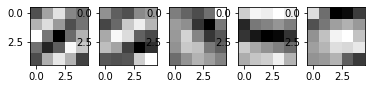

In [94]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5)
for i,ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(model_dict['conv_layer.weight'][i].squeeze(dim=0),cmap='gray')

In [15]:
model2=ConvNet()
model2.load_state_dict(torch.load('params'))

<All keys matched successfully>

In [16]:
model2.state_dict()

OrderedDict([('conv_layer.weight',
              tensor([[[[-0.2030, -0.8651, -0.7642, -0.1423, -0.3536],
                        [-1.8798, -0.1505,  0.8105,  0.7781,  0.1633],
                        [-1.2740,  1.3972,  0.9516,  0.7018, -0.2400],
                        [ 0.7172,  1.1572,  0.1489,  1.2499,  0.7846],
                        [-0.5489, -0.7109, -0.5245,  1.3439,  1.0424]]],
              
              
                      [[[-1.1130, -0.6436, -0.3769, -0.9941, -1.4729],
                        [-0.2437, -1.1164, -1.0437, -1.5121, -1.3858],
                        [ 0.8376,  0.1136,  0.3002,  0.3553, -0.1792],
                        [ 0.5741,  0.6070,  0.7928,  0.9778,  0.2901],
                        [ 0.1330,  0.3488,  0.5451,  0.7203,  1.6705]]],
              
              
                      [[[-0.2092, -0.6047, -0.2038,  0.1948,  1.3710],
                        [ 0.3545,  0.5218,  0.6004,  0.8289,  0.6659],
                        [ 0.9258,  1.1569,  1.017

In [95]:
#Testing the classification accuracy on the test set:
test_dataloader=DataLoader(dataset=Test_imgs,batch_size=10000)
Inputs,Outputs=test_dataloader.__iter__().__next__()

In [96]:
Inputs.shape

torch.Size([10000, 1, 28, 28])

In [98]:
Y=model(Inputs)
predictions=Y.max(dim=1)[1]
print(f'Accuracy on the test set is {accuracy(predictions,Outputs)}/10000')

Accuracy on the test set is 9858/10000


In [127]:
def WrongClassifications(predictions,labels):
    i=0
    wrong_cl=[]
    for p,l in zip(predictions,labels):
        if p!=l:
            wrong_cl.append((i,p,l))
        i+=1
    return wrong_cl            

In [128]:
mistakes=WrongClassifications(predictions,Outputs)

In [159]:
import random

(tensor(7), tensor(2))

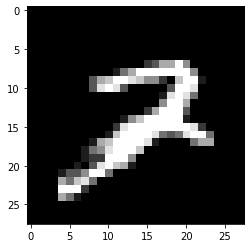

In [158]:
#Viewing some of the images that were wrongly classified by the network
index,pred,lbl=random.choice(mistakes)
plt.imshow(Inputs[index].squeeze(dim=0),cmap='gray')
(pred,lbl)